# ECSE415 - Intro to Computer Vision
## Tutorial 5 - Clustering

## K-Means Clustering
Data in a one-dimensional feature space

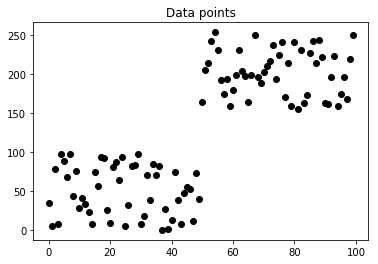

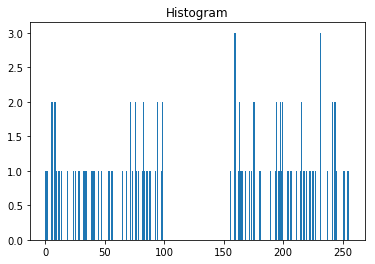

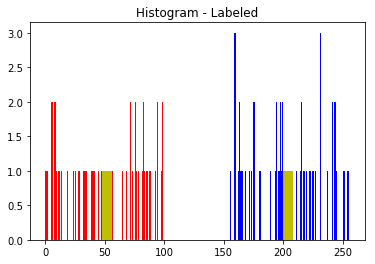

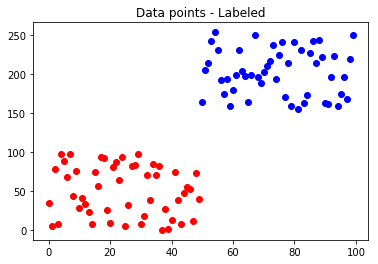

In [1]:
##########################
# K-MEANS 1-D CLUSTERING #
##########################

import cv2
import numpy as np
import matplotlib.pyplot as plt

# create some 1-dimensional data (i.e. only one feature)
x1 = np.random.randint(0, 100, 50) # 50 points between [0,100]
x2 = np.random.randint(155, 255, 50) # 50 points between [155,255]
# stack together into one dataset
x = np.hstack((x1, x2))
# make sure that the data points are float32 and are stored in rows
# each feature is arranged in a column, while each row corresponds
# to an input test sample
x = np.float32(x)
x = x.reshape((100, 1))

# display the data
plt.plot(x, "ko")
plt.title("Data points")
plt.show()
# display the histogram having 255 bins, between 0 to 255
plt.hist(x, 256, [0, 256])
plt.title("Histogram")
plt.show()

# before calling openCV's kmeans, we need to specify the stop criteria
# stop when either 100 iterations or an accuracy of 1 is reached
# define criteria = (type, max_iter=100, epsilon=1.0)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
# set number of clusters
K = 2

# apply Kmeans
# cv2.kmeans(Data, nCluters, criteria, nAttempts, flags)
# compactness: the sum of squared distance from each point to their
#   corresponding centers
# labels: the label array (each element marked '0', '1', '2', etc.)
# centers: array of centers of clusters
compactness, labels, centers = cv2.kmeans(x, K, None, criteria, 10,
                                         flags=cv2.KMEANS_RANDOM_CENTERS)

# can easily split the data into different clusters depending on their labels
A = x[labels==0]
B = x[labels==1]

# plot 'A' in red, 'B' in blue, and "centers" in yellow
plt.hist(A, 256, [0,256], color='r')
plt.hist(B, 256, [0, 256], color='b')
plt.hist(centers, 32, [0,256], color='y')
plt.title("Histogram - Labeled")
plt.show()

# display clustered data points
i1 = np.arange(A.shape[0])
i2 = np.arange(A.shape[0], A.shape[0] + B.shape[0])
plt.plot(i1, A, "ro", i2, B, "bo")
plt.title("Data points - Labeled")
plt.show()

Data in a two-dimensional feature space

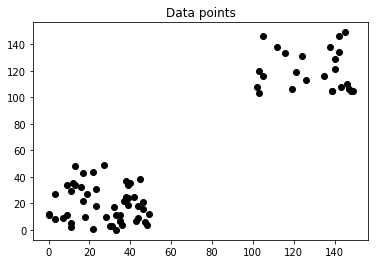

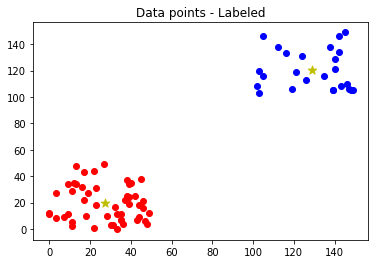

In [13]:
##########################
# K-MEANS 2-D CLUSTERING #
##########################

# create 2-D data points with 50 samples each 
# (features are stored in columns)
X1 = np.random.randint(0, 50, (50,2))
X2 = np.random.randint(100, 150, (50,2))
X = np.vstack((X1, X2)) # a 100x2 data matrix
# convert to float32
X = np.float32(X)

# display the data (scatter plot)
plt.scatter(X[:,0], X[:,1], color='k')
plt.title("Data points")
plt.show()

# specify the stop criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
# set number of clusters
K = 2

# apply Kmeans
compactness, labels, centers = cv2.kmeans(X, K, None, criteria, 10,
                                         flags=cv2.KMEANS_RANDOM_CENTERS)

# seperate the data
A = X[labels.ravel()==0]
B = X[labels.ravel()==1]

# plot the data
plt.scatter(A[:,0], A[:,1], color='b')
plt.scatter(B[:,0], B[:,1], color='r')
plt.scatter(centers[:,0], centers[:,1], s=80, color='y', marker='*')
plt.title("Data points - Labeled")
plt.show()

Segmentation using Intensity Information

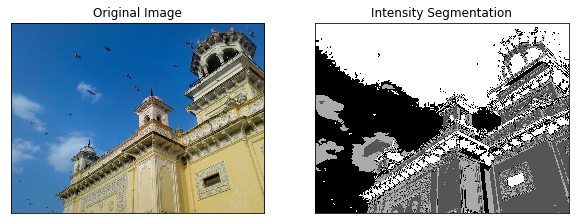

In [4]:
###########################
# K-MEANS INTENSITY IMAGE #
###########################

# read image
img = cv2.imread("/home/gary/opencv/samples/data/home.jpg")
# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# reshape image into [row=instance, col=features]
img_data = img_gray.reshape((img.shape[0] * img.shape[1], 1))
# convert to float32
img_data = np.float32(img_data)

# define criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# set number of clusters
K = 4

# apply kmeans
_, labels,_ = cv2.kmeans(img_data, K, None, criteria, 10, 
                         flags=cv2.KMEANS_RANDOM_CENTERS)
# reshape labels back into image
img_label = labels.reshape((img.shape[0], img.shape[1]))

# display plots
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_label, cmap="gray")
plt.title("Intensity Segmentation"), plt.xticks([]), plt.yticks([])
plt.show()

Segmentation using RGB Information

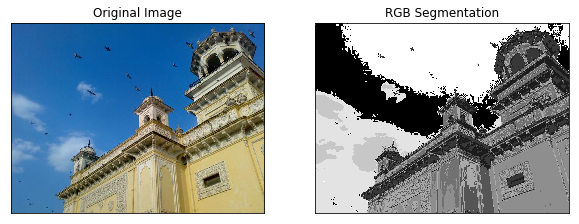

In [6]:
###########################
# K-MEANS INTENSITY IMAGE #
###########################

# read image
img = cv2.imread("/home/gary/opencv/samples/data/home.jpg")

# reshape image into [row=instance, col=features]
img_data = img.reshape((img.shape[0] * img.shape[1], 3))
# convert to float32
img_data = np.float32(img_data)

# define criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# set number of clusters
K = 10

# apply kmeans
_, labels,_ = cv2.kmeans(img_data, K, None, criteria, 10, 
                         flags=cv2.KMEANS_RANDOM_CENTERS)
# reshape labels back into image
img_label = labels.reshape((img.shape[0], img.shape[1]))

# display plots
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_label, cmap="gray")
plt.title("RGB Segmentation"), plt.xticks([]), plt.yticks([])
plt.show()